In [68]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

#import libraryที่ต้องใช้
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import math
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

#ดูdirectoryของไฟล์
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/playground-series-s3e23/sample_submission.csv
/kaggle/input/playground-series-s3e23/train.csv
/kaggle/input/playground-series-s3e23/test.csv


# Data Preparation

In [69]:
#กำหนดชื่อสำหรับเรียกใช้แต่ละไฟล์
test = pd.read_csv('../input/playground-series-s3e23/test.csv', index_col='id')
train = pd.read_csv('/kaggle/input/playground-series-s3e23/train.csv')
test = pd.read_csv('/kaggle/input/playground-series-s3e23/test.csv')
submission = pd.read_csv('/kaggle/input/playground-series-s3e23/sample_submission.csv')

In [70]:
#ตรวจสอบหา missing value ในtest set
missing_values = test.isnull().sum()
print("Missing value in test:",missing_values[missing_values > 0])
print('Duplicates in test:', test.duplicated().sum())

Missing value in test: Series([], dtype: int64)
Duplicates in test: 0


In [71]:
#ตรวจสอบหา missing value ในtrain set
missing_values = train.isnull().sum()
print("Missing value in train:",missing_values[missing_values > 0])
print('Duplicates in train:', train.duplicated().sum())

Missing value in train: Series([], dtype: int64)
Duplicates in train: 0


**ตรวจดูลักษณะของข้อมูล**

In [72]:
train.describe()

,id,loc,v(g),ev(g),iv(g),n,v,l,d,i,...,t,lOCode,lOComment,lOBlank,locCodeAndComment,uniq_Op,uniq_Opnd,total_Op,total_Opnd,branchCount
count,101763.000000,101763.000000,101763.000000,101763.000000,101763.000000,101763.000000,101763.000000,101763.000000,101763.000000,101763.000000,...,101763.000000,101763.000000,101763.000000,101763.000000,101763.000000,101763.000000,101763.000000,101763.000000,101763.000000,101763.000000
mean,50881.000000,37.347160,5.492684,2.845022,3.498826,96.655995,538.280956,0.111634,13.681881,27.573007,...,1141.357982,22.802453,1.773945,3.979865,0.196604,11.896131,15.596671,57.628116,39.249698,9.839549
std,29376.592059,54.600401,7.900855,4.631262,5.534541,171.147191,1270.791601,0.100096,14.121306,22.856742,...,9862.795472,38.541010,5.902412,6.382358,0.998906,6.749549,18.064261,104.537660,71.692309,14.412769
min,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,25440.500000,13.000000,2.000000,1.000000,1.000000,25.000000,97.670000,0.050000,5.600000,15.560000,...,31.380000,7.000000,0.000000,1.000000,0.000000,8.000000,7.000000,15.000000,10.000000,3.000000
50%,50881.000000,22.000000,3.000000,1.000000,2.000000,51.000000,232.790000,0.090000,9.820000,23.360000,...,125.400000,14.000000,0.000000,2.000000,0.000000,11.000000,12.000000,30.000000,20.000000,5.000000
75%,76321.500000,42.000000,6.000000,3.000000,4.000000,111.000000,560.250000,0.150000,18.000000,34.340000,...,565.920000,26.000000,1.000000,5.000000,0.000000,16.000000,20.000000,66.000000,45.000000,11.000000
max,101762.000000,3442.000000,404.000000,165.000000,402.000000,8441.000000,80843.080000,1.000000,418.200000,569.780000,...,935923.390000,2824.000000,344.000000,219.000000,43.000000,410.000000,1026.000000,5420.000000,3021.000000,503.000000


In [73]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101763 entries, 0 to 101762
Data columns (total 23 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   id                 101763 non-null  int64  
 1   loc                101763 non-null  float64
 2   v(g)               101763 non-null  float64
 3   ev(g)              101763 non-null  float64
 4   iv(g)              101763 non-null  float64
 5   n                  101763 non-null  float64
 6   v                  101763 non-null  float64
 7   l                  101763 non-null  float64
 8   d                  101763 non-null  float64
 9   i                  101763 non-null  float64
 10  e                  101763 non-null  float64
 11  b                  101763 non-null  float64
 12  t                  101763 non-null  float64
 13  lOCode             101763 non-null  int64  
 14  lOComment          101763 non-null  int64  
 15  lOBlank            101763 non-null  int64  
 16  lo

# Feature meaning 
เข้าใจความหมายของแต่ละ Feature แบบคร่าวๆ
1. **loc**: Lines of Code. This usually refers to the number of lines in the source code.

2. **v(g), ev(g), iv(g)**: These are variations of cyclomatic complexity, a metric representing the number of linearly independent paths through the source code. Higher complexity can lead to harder maintenance and increased chances of defects.

3. **n, v, l, d, i, e, b, t**: These seem to be the Halstead metrics which are used to understand various properties of a program:
   - **n**: Total number of operators and operands.
   - **v**: Program volume. It is a measure of the size of the implementation of an algorithm.
   - **l**: Program level. It measures the level of abstraction chosen for a particular algorithm.
   - **d**: Difficulty. It measures how difficult the program is to write or understand.
   - **i**: Intelligence. Indicates the cognitive weight of understanding the program.
   - **e**: Effort. Represents the effort required to write or understand the code.
   - **b**: Error estimate. Predicts the number of errors in the code.
   - **t**: Time estimate to understand the program.

4. **lOCode**: Lines of code without comments.

5. **lOComment**: Lines of code that are comments.

6. **lOBlank**: Blank lines in the code.

7. **locCodeAndComment**: Lines of code that have both code and comments.

8. **uniq_Op, uniq_Opnd**: Unique operators and unique operands, respectively.

9. **total_Op, total_Opnd**: Total number of operators and operands, respectively.

10. **branchCount**: Likely a metric related to the number of branches or decision points in the code. It may be related to the cyclomatic complexity.

11. **defects**: This seems to be the target variable for your binary classification task. It's a boolean, so it probably indicates whether a software module is defective (`True`) or not (`False`).

In [74]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histograms for each feature
#train.hist(figsize=(35, 35))
#plt.tight_layout()  # Adjusts subplots for better layout
#plt.show()


In [75]:
features = [f for f in train.columns.tolist() if f !='defects']
len(features)

22

In [76]:
#num_features = len(train.columns)
#num_cols = 4
#num_rows = math.ceil(num_features / num_cols)

#plt.figure(figsize=(15, num_rows * 4))  # Adjusting the figure size based on the number of rows

#for i, column in enumerate(train.columns):
#    plt.subplot(num_rows, num_cols, i + 1)
#    sns.boxplot(y=train[column])
#    plt.title(column)

#plt.tight_layout()
#plt.show()

# **Tatget**

,Number,Percent
defects,,
False,78699,0.773356
True,23064,0.226644


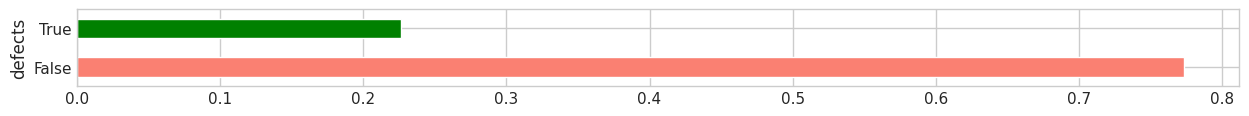

In [77]:
plt.gca().set_facecolor('white')
train['defects'].value_counts(normalize=True).plot(kind='barh', figsize=(15,1), color=['salmon','green'])

pd.DataFrame(data= {'Number': train['defects'].value_counts(), 
                    'Percent': train['defects'].value_counts(normalize=True)})

# **Correlation matrix**

เพื่อดูความสัมพันธ์ของแต่ละ Feature

In [78]:
corr = train[features].corr(numeric_only=True).round(3)
corr.style.background_gradient(cmap='twilight')

,id,loc,v(g),ev(g),iv(g),n,v,l,d,i,e,b,t,lOCode,lOComment,lOBlank,locCodeAndComment,uniq_Op,uniq_Opnd,total_Op,total_Opnd,branchCount
id,1.000000,0.001000,0.003000,-0.001000,0.001000,0.004000,0.005000,-0.002000,0.004000,-0.001000,0.001000,0.004000,0.003000,0.003000,0.003000,0.004000,0.002000,0.004000,0.004000,0.004000,0.004000,0.002000
loc,0.001000,1.000000,0.762000,0.545000,0.696000,0.760000,0.758000,-0.388000,0.599000,0.486000,0.501000,0.740000,0.512000,0.803000,0.528000,0.671000,0.246000,0.367000,0.638000,0.765000,0.762000,0.763000
v(g),0.003000,0.762000,1.000000,0.729000,0.791000,0.631000,0.618000,-0.387000,0.574000,0.305000,0.430000,0.612000,0.472000,0.642000,0.380000,0.462000,0.208000,0.390000,0.532000,0.639000,0.606000,0.967000
ev(g),-0.001000,0.545000,0.729000,1.000000,0.545000,0.391000,0.368000,-0.325000,0.358000,0.161000,0.275000,0.361000,0.280000,0.383000,0.293000,0.282000,0.165000,0.200000,0.279000,0.395000,0.373000,0.775000
iv(g),0.001000,0.696000,0.791000,0.545000,1.000000,0.590000,0.585000,-0.292000,0.487000,0.320000,0.394000,0.564000,0.415000,0.637000,0.338000,0.426000,0.179000,0.379000,0.551000,0.592000,0.567000,0.748000
n,0.004000,0.760000,0.631000,0.391000,0.590000,1.000000,0.928000,-0.300000,0.808000,0.725000,0.570000,0.918000,0.602000,0.912000,0.566000,0.775000,0.263000,0.618000,0.819000,0.963000,0.953000,0.626000
v,0.005000,0.758000,0.618000,0.368000,0.585000,0.928000,1.000000,-0.254000,0.748000,0.673000,0.582000,0.935000,0.590000,0.899000,0.532000,0.735000,0.242000,0.544000,0.799000,0.936000,0.942000,0.609000
l,-0.002000,-0.388000,-0.387000,-0.325000,-0.292000,-0.300000,-0.254000,1.000000,-0.426000,-0.162000,-0.092000,-0.254000,-0.097000,-0.290000,-0.188000,-0.289000,-0.125000,-0.399000,-0.284000,-0.294000,-0.291000,-0.416000
d,0.004000,0.599000,0.574000,0.358000,0.487000,0.808000,0.748000,-0.426000,1.000000,0.515000,0.471000,0.755000,0.494000,0.779000,0.487000,0.676000,0.268000,0.783000,0.691000,0.808000,0.785000,0.575000
i,-0.001000,0.486000,0.305000,0.161000,0.320000,0.725000,0.673000,-0.162000,0.515000,1.000000,0.286000,0.681000,0.301000,0.677000,0.436000,0.654000,0.214000,0.528000,0.803000,0.702000,0.740000,0.314000


# Feature selection

เลือก Feature ที่แสดงถึงความสัมพันธ์ระหว่างTargetที่เราพยายามคาดการณ์ได้ดีที่สุดและ Drop feature ที่ไม่มีประโยชน์ เพื่อที่จะสามารถทำงานได้รวดเร็วและมีประสิทธิภาพมากยิ่งขึ้น

In [80]:
#Drop feature ที่ต่ำกว่าเกณฑ์เพื่อไม่ให้เสียเวลาในการ Train
all_features = set(train.columns)
features_to_keep = set({'v(g)', 'iv(g)', 'n', 'v', 'd', 'b', 't', 'lOCode', 'lOBlank', 'uniq_Op', 'uniq_Opnd', 'total_Op', 'total_Opnd', 'branchCount','defects'})
features_to_drop = all_features - features_to_keep
train = train.drop(features_to_drop, axis=1)

In [81]:
train.head()

,v(g),iv(g),n,v,d,b,t,lOCode,lOBlank,uniq_Op,uniq_Opnd,total_Op,total_Opnd,branchCount,defects
0,3.0,2.0,60.0,278.63,19.56,0.09,302.71,17,1,16.0,9.0,38.0,22.0,5.0,False
1,2.0,2.0,32.0,151.27,7.00,0.05,52.04,11,1,11.0,11.0,18.0,14.0,3.0,False
2,2.0,2.0,45.0,197.65,8.05,0.07,97.45,8,1,12.0,11.0,28.0,17.0,3.0,False
3,1.0,1.0,23.0,94.01,5.25,0.03,26.31,4,2,8.0,6.0,16.0,7.0,1.0,True
4,2.0,2.0,17.0,60.94,5.63,0.02,20.31,7,2,7.0,6.0,10.0,10.0,3.0,False


In [82]:
#Drop feature ที่ต่ำกว่าเกณฑ์เพื่อไม่ให้เสียเวลาในการ Train
all_features2 = set(test.columns)
features_to_keep2 = set({'v(g)', 'iv(g)', 'n', 'v', 'd', 'b', 't', 'lOCode', 'lOBlank', 'uniq_Op', 'uniq_Opnd', 'total_Op', 'total_Opnd', 'branchCount','defects'})
features_to_drop2 = all_features2 - features_to_keep2
test = test.drop(features_to_drop, axis=1)

In [83]:
test.head()

,v(g),iv(g),n,v,d,b,t,lOCode,lOBlank,uniq_Op,uniq_Opnd,total_Op,total_Opnd,branchCount
0,5.0,4.0,144.0,824.82,26.96,0.27,1257.60,30,3,21.0,23.0,87.0,57.0,9.0
1,8.0,2.0,125.0,646.24,22.82,0.22,804.58,23,2,18.0,19.0,70.0,49.0,15.0
2,11.0,10.0,545.0,3831.40,48.15,1.28,6453.34,99,17,26.0,53.0,333.0,244.0,21.0
3,7.0,7.0,156.0,855.71,17.23,0.29,896.42,45,10,15.0,26.0,88.0,60.0,13.0
4,3.0,3.0,52.0,238.42,9.60,0.08,145.80,16,4,12.0,15.0,30.0,24.0,5.0


In [84]:
features = [f for f in train.columns.tolist() if f !='defects']
len(features)

14

# **Evaluation Metric (AUC)**

เนื่องจากการแข่งขันนี้จะประเมินคะแนนจากค่า AUC(Area under ROC curve)

In [85]:
#สร้าง function สำหรับ plot ROC curve
from sklearn.metrics import roc_auc_score, roc_curve, auc

def roc_auc(true_list, pred_list, figlen):
    
    fpr, tpr, _ = roc_curve(true_list, pred_list)    
    roc_auc = auc(fpr, tpr)
    print(f'\nROC_AUC: %0.6f\n' %roc_auc)
    
    if (figlen > 0):
        sns.set()
        plt.style.use('seaborn-v0_8-whitegrid')
        plt.figure(figsize=(figlen, figlen), facecolor='white')
        plt.gca().set_facecolor('lightgray')
        plt.fill_between(fpr, tpr, color='r', alpha=0.1)
        plt.plot(fpr, tpr, color='red', lw=2, label='ROC curve')
        plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
        plt.xlim([-0.01, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('The area under the ROC curve\n', fontsize=16, c='darkred')
        plt.legend(loc="lower right")
        plt.show()

# Gaussian Naïve Bayes
* เลือกใช้โมเดลนี้เนื่องจาก output ที่เราต้องการนั้นคือความน่าจะเป็นที่จะมี Defect หรือไม่เราจึงต้องเลือกใช้ Generative Model อย่าง Gaussian Naïve Bayes
* Naive Bayes classification เป็น Model หนึ่งในการแบ่งกลุ่มที่เราต้องการโดยใช้ความน่าจะเป็นที่ชื่อว่า Naive bayes ยกตัวอย่างเช่น เราต้องการแบ่งกลุ่มว่าคนไข้ที่เข้ามานั้นเป็นไข้หวัดใหญ่หรือไม่ ซึ่งเราจะต้องถามอาการคนไข้มาให้ได้มากที่สุดว่าอาการเป็นอย่างไร แล้วเราถึงจะคาดคะเนจากข้อมูลอาการที่ได้ว่ามีความน่าจะเป็น ไข้หวัดใหญ่เท่าไหร่ เช่นความน่าจะเป็น 95% เป็นต้น ซึ่งความน่าจะเป็นดังกล่าว เราจะใช้ Naive Bayes ในการหาค่าความน่าจะเป็นนั่นเอง

In [86]:
#import Libraryที่ต้องใช้
from sklearn.naive_bayes import GaussianNB
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import QuantileTransformer


กำหนดค่า X train, X train

In [87]:
X = train[features]
y = train['defects']

test = test[features].copy()

In [88]:
#ใช้ scikit-learn เพื่อสร้าง pipeline สำหรับ transforming&fitting เพื่อทำ Gaussian Naive Bayes (GaussianNB) model
transformed = pd.DataFrame(QuantileTransformer(output_distribution='normal').fit_transform(X))
pipeline = make_pipeline(QuantileTransformer(output_distribution='normal'), GaussianNB())
#model fitting
pipeline.fit(X, y)

Pipeline(steps=[('quantiletransformer',
                 QuantileTransformer(output_distribution='normal')),
                ('gaussiannb', GaussianNB())])

In [89]:
cross_val_score(pipeline, X, y, scoring='roc_auc', cv=10).mean()

0.754008931750743


ROC_AUC: 0.754132



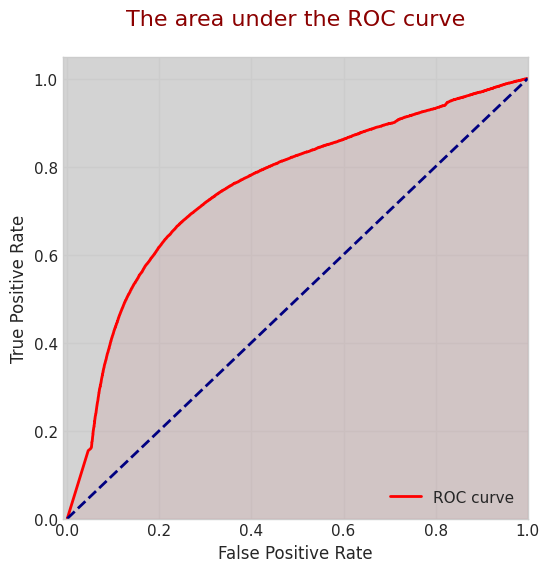

In [90]:
#plot ROC curve และดูค่า AUC
roc_auc(y, pipeline.predict_proba(X)[:,1], 6)

AUC = 0.754 นั่นคือคะแนนที่เราได้แต่เรายังสามารถเพิ่มประสิทธิภาพของโมเดลอีกได้ด้วยการ Optimize

(2.865510047194108e-07, 1.0)

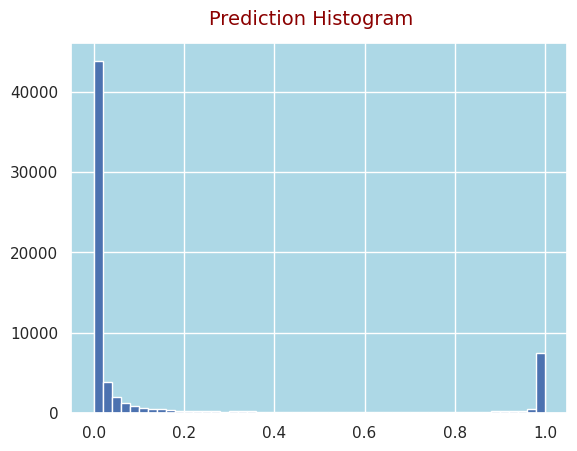

In [91]:
preds_bayes = pipeline.predict_proba(test)[:,1]
#plotเพื่อดูค่าที่ทำนายออกมาได้
sns.set()
plt.hist(preds_bayes, bins=50)
plt.gca().set_facecolor('lightblue')
plt.suptitle('Prediction Histogram', y=0.95, fontsize=14, c='darkred')

min(preds_bayes), max(preds_bayes)

จากการ plot ดูคำตอบนั้นก็จะพบว่าคำตอบนั้นจะมีการกระจายช่วงกันน้อยมากและไปกระจุกกันอยู่ที่ 0 และ 1 มาก

In [92]:
#สร้างไฟล์สำหรับ submit เพื่อดูคะแนนของ Model ที่ยังไม่ Optimize
sub1 = submission.copy()
sub1['defects'] = preds_bayes
sub1.to_csv('submission1.csv',index=False)
!ls

submission1.csv  submission2.csv


# **LightGBM (Bayesian optimization)**

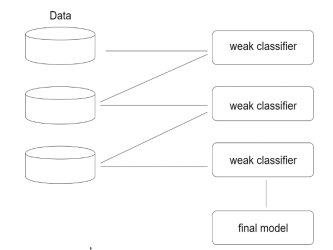

* LightGBM (Light Gradient Boosting Machine) คือ open-source machine learning framework ที่ออกแบบมาเพื่อเพิ่มประสิทธิภาพด้วยวิธีการ gradient boosting. Gradient boosting นั้นคือ ensemble learning technique ที่ใช้ได้สำหรับโมเดล classification และ regression , โดยเป้าหมายก็คือสร้าง predictive model ที่ดีโดยการ combining the predictions of multiple weak models, typically decision trees.โดย Model นี้มีต้นแบบมาจาก decision trees

* Boosting เป็นวิธีการที่ใช้ใน Machine Leaning เป็นการนำ classifier ที่มีความแม่นยำต่ำ (Weak Classifier) มาทำนายข้อมูล จากนั้นจะให้ classifier ที่มีความแม่นยำต่ำตัวใหม่มาแก้ไข error โดยผลรวมของ classifier จะเกิดเป็น classifier ใหม่ ขึ้น และจะทำแบบนี้ไปจนแบบจำลองที่ได้ไม่มีค่าคลาดเคลื่อนเกิดขึ้น ซึ่งจะเป็นแบบจำลองที่ดีที่สุด ทั้งนี้ Machine Learning modelอาจสร้างข้อผิดพลาดในการทำนายโดยขึ้นอยู่กับความแม่นยำของชุดข้อมูลการฝึกฝน ตัวอย่างเช่น หากโมเดลจดจำแมวได้รับการฝึกฝนด้วยภาพของแมวสีขาวเท่านั้น โมเดลดังกล่าวก็อาจจดจำผิดเป็นแมวดำในบางครั้ง Boosting จะพยายามแก้ไขปัญหานี้ด้วยการฝึกฝนหลายโมเดลตามลำดับเพื่อปรับปรุงความแม่นยำของระบบโดยรวม

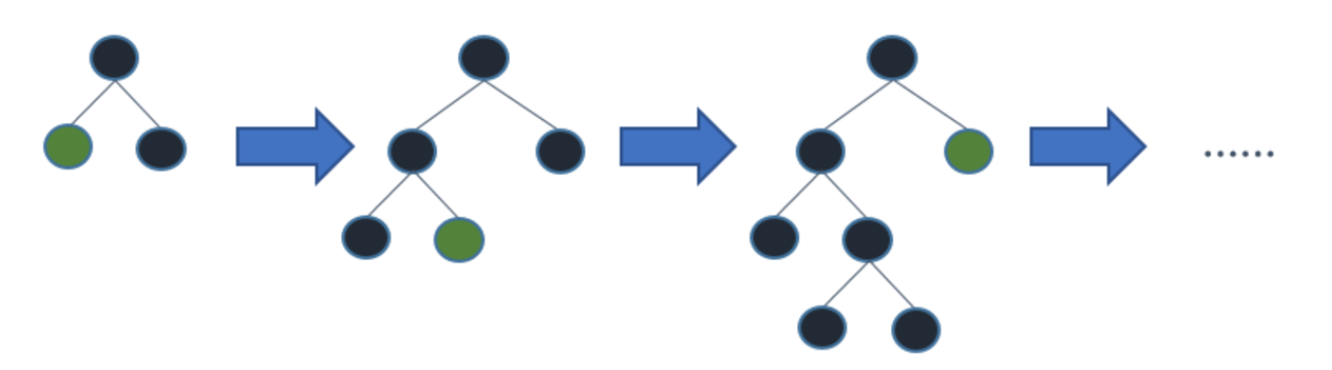

* โมเดลจะทำการค้นหาตัวแปรต้นที่ส่งผลอย่างมีนัยสำคัญต่อค่าตัวแปรตามที่สนใจ โดยการเปรียบเทียบความสามารถในการแบ่งกลุ่มค่าผลลัพธ์ของตัวแปรตาม ตามค่าตัวแปรต้นที่เปลี่ยนแปลงไป จากนั้นจะทำการสร้างเงื่อนไขว่า ถ้าหากตัวแปรต้นดังกล่าวมีค่าอยู่ในช่วงแต่ละช่วง ค่าตัวแปรตามควรจะมีค่าเท่าไหร่ โดยใช้ค่าเฉลี่ยของตัวแปรตามที่ถูกจัดกลุ่มอยู่ในกลุ่มเดียวกัน 
* จากนั้นโมเดลจะตรวจสอบว่าการแบ่งกลุ่มดังกล่าวสามารถแยกค่าตัวแปรตามที่มีค่าแตกต่างกันออกจากกัน และจับกลุ่มค่าตัวแปรตามที่มีค่าใกล้เคียงกันไว้ด้วยกัน ดีกว่าการไม่แบ่งกลุ่มหรือไม่ ซึ่งถ้าหากไม่ ก็จะไม่ทำการแบ่งกลุ่มนั้น
* เมื่อได้ตัวแปรต้นที่ใช้ในการแบ่งกลุ่มแล้ว โมเดลจะเริ่มวาดต้นไม้โดยใช้ตัวแปรต้นดังกล่าวแตกกิ่งค่าความเป็นไปได้ของตัวแปรตามออกมา 
* จากนั้นโมเดลจะทำซ้ำสามขั้นตอนดังกล่าว กับตัวแปรต้นอื่น ๆ ที่ยังไม่ถูกเลือก จนได้ต้นไม้ที่ประกอบด้วยกิ่งจำนวนมาก ซึ่งมีความละเอียดในการทำนายค่าตัวแปรตามที่เพียงพอ

โมเดลจะทำการสร้างต้นไม้ด้วยวิธีดังกล่าวหลาย ๆ ต้น ซึ่งในการสร้างต้นไม้แต่ละต้น จะมีการสุ่มเลือกตัวแปรต้น และชุดข้อมูล ทำให้การสร้างแต่ละครั้ง ได้ผลลัพธ์ที่แตกต่างกัน จากนั้นใช้ค่าเฉลี่ยของการทำนายจากต้นไม้หลาย ๆ ต้น เป็นค่าทำนายตัวแปรตามสุดท้าย

In [93]:
from lightgbm import LGBMClassifier
from bayes_opt import BayesianOptimization

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split

from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import RepeatedStratifiedKFold

#from sklearn.experimental import enable_hist_gradient_boosting
#from sklearn.ensemble import HistGradientBoostingClassifier

In [94]:
#ใช้ในกระบวนการ hyperparameter optimization เพื่อค้นหาcombinationที่ดีที่สุดของไฮเปอร์พารามิเตอร์ที่จะเพิ่มคะแนน ROC AUC สูงสุด
def lgbm_cl_bo(min_child_samples, colsample_bytree, learning_rate, num_leaves, reg_alpha, reg_lambda):
    
    params_lgbm = {}
    params_lgbm['min_child_samples'] = round(min_child_samples)
    params_lgbm['colsample_bytree'] = colsample_bytree
    params_lgbm['learning_rate'] = learning_rate
    params_lgbm['num_leaves'] = round(num_leaves)
    params_lgbm['reg_alpha'] = reg_alpha
    params_lgbm['reg_lambda'] = reg_lambda    
       
    params_lgbm['boosting_type'] ='gbdt'   # Manual optimization
    params_lgbm['objective'] ='binary'     # Manual optimization
    params_lgbm['subsample'] = 1.0
    params_lgbm['max_bin'] = 1023
    params_lgbm['n_jobs'] = -1

    scores = cross_val_score(LGBMClassifier(**params_lgbm, random_state=2920), X, y, scoring='roc_auc', cv=5).mean()
    score = scores.mean()
    return score

In [95]:
params_lgbm ={'min_child_samples':(800, 1200),
              'colsample_bytree':(0.3, 1.0),
              'learning_rate':(0.005, 0.1),
              'num_leaves':(20, 60),
              'reg_alpha':(0.0, 10.0),
              'reg_lambda':(0.0, 5.0)}

lgbm_bo = BayesianOptimization(lgbm_cl_bo, params_lgbm, random_state=2920)
lgbm_bo.maximize(n_iter=30, init_points=20)

|   iter    |  target   | colsam... | learni... | min_ch... | num_le... | reg_alpha | reg_la... |
-------------------------------------------------------------------------------------------------
| 1         | 0.7853    | 0.9111    | 0.05009   | 887.4     | 47.75     | 7.915     | 1.226     |
| 2         | 0.7847    | 0.9502    | 0.06947   | 833.5     | 44.51     | 2.255     | 1.838     |
| 3         | 0.7854    | 0.4816    | 0.07103   | 1.027e+03 | 38.75     | 5.368     | 1.941     |
| 4         | 0.7855    | 0.9072    | 0.05826   | 824.2     | 27.11     | 4.494     | 2.04      |
| 5         | 0.7841    | 0.4835    | 0.01853   | 927.6     | 34.94     | 9.711     | 4.751     |
| 6         | 0.7831    | 0.9807    | 0.009078  | 1.083e+03 | 39.49     | 6.385     | 0.6945    |
| 7         | 0.7849    | 0.7085    | 0.02226   | 1.084e+03 | 49.88     | 0.6991    | 4.858     |
| 8         | 0.7856    | 0.3928    | 0.08767   | 1.181e+03 | 42.19     | 7.881     | 2.85      |
| 9         | 0.7841

In [96]:
#เรียกชุด hyperparameters ที่ให้ผลลัพธ์เป็นค่าเป้าหมายสูงสุด (ในกรณีนี้คือคะแนน ROC AUC สูงสุด) หลังจากรัน Bayesian Optimization
pmax_bayes = lgbm_bo.max['params']
pmax_bayes

{'colsample_bytree': 0.5243100070399401,
 'learning_rate': 0.07782404174489192,
 'min_child_samples': 953.5133768689756,
 'num_leaves': 21.53888925192511,
 'reg_alpha': 1.853414802113278,
 'reg_lambda': 4.374320592171874}

In [97]:
#เซ็ต hyperparameters โดยอ้างอิงมาจากผลลัพท์ของ Bayesian Optimization ที่ได้ทำใน code ก่อนหน้า
model = LGBMClassifier(n_estimators= 20000, 
                       learning_rate= 0.07,
                       objective= 'binary', 
                       boosting_type= 'gbdt', 
                       
                       subsample= 1.0,
                       num_leaves= 23,  
                       max_bin= 1023,
                       n_jobs= -1,
                           
                       reg_alpha= 0.65,
                       reg_lambda= 3.1,
                       colsample_bytree= 0.568,
                       min_child_samples= 864,     
                       random_state= 1920)

In [98]:
#ดำเนินการ gradient boosting using histogram-based techniques
from sklearn.ensemble import HistGradientBoostingClassifier
model0 = HistGradientBoostingClassifier(max_iter=250,
                                        validation_fraction=None, 
                                        learning_rate=0.007, 
                                        max_depth=10, 
                                        min_samples_leaf=24, 
                                        max_leaf_nodes=60,
                                        random_state=1920,
                                        verbose=0)

In [99]:
#สร้าง cross-validation splitter objectโดยแบ่งชุดข้อมูลของคุณออกเป็นคู่ train-test หลายๆคู่เพื่อทำ cross-validation
rkf = RepeatedKFold(n_splits=5, n_repeats=10, random_state=1920)

print('Total number of folds:', rkf.get_n_splits(X, y))

Total number of folds: 50


In [100]:
#loop เพื่อทำซ้ำ k-fold cross-validation (RepeatedKFold object) 
#เพื่อ train และประเมิน machine learning models (either HistGradientBoostingClassifier or LGBMClassifier) 
#คำนวณ ROC&AUC score และหยุดทำเมื่อได้ค่าที่ต้องการ
import random
from lightgbm.callback import early_stopping, log_evaluation

counter = 0
auc_mean = 0
preds = np.zeros(len(test))
rkf = RepeatedKFold(n_splits=5, n_repeats=10, random_state=1920)

for fold, (train_idx, valid_idx) in enumerate(rkf.split(X)):  
    X_train, y_train = X.iloc[train_idx], y.iloc[train_idx]
    X_valid, y_valid = X.iloc[valid_idx], y.iloc[valid_idx]  

    print(f'\n:::::::::::::::::: Fold ~ {fold+1} :::::::::::::::::::')
    
    N = random.randrange(4) 
    if (N == 0):
        print('HGBClassifier >>')
        model0.fit(X_train, y_train)
        oof = model0.predict_proba(X_valid)[:, -1]

    if (N != 0):
        print('LGBMClassifier >>\n')
        model.fit(X_train, y_train,             
          eval_set=[(X_valid, y_valid)], 
          eval_metric='auc', 
          callbacks=[early_stopping(stopping_rounds=250), log_evaluation(period=100)])

        oof = model.predict_proba(X_valid)[:, -1]
    
    auc = roc_auc_score(y_valid, oof)
    if (auc <= 0.79): 
        print('\nAUC Score:', auc, ' # was ignored.')
    
    if (auc > 0.79): 
        counter += 1
        print('\nAUC Score:', auc, ' # it is ok.')
        auc_mean += roc_auc_score(y_valid, oof) 
        preds += model.predict_proba(test)[:, -1] 

auc_mean = auc_mean / counter      
preds = preds / counter 

print('\n', '='* 40)
print(' .'* 20)
print(' AUC Score (mean):', auc_mean)
print(' .'* 20)
print('='* 40, '\n')

print('Total number of folds:', rkf.get_n_splits(X, y))
print('Number of valid folds:', counter)


:::::::::::::::::: Fold ~ 1 :::::::::::::::::::
LGBMClassifier >>

Training until validation scores don't improve for 250 rounds
[100]	valid_0's auc: 0.787554	valid_0's binary_logloss: 0.436763
[200]	valid_0's auc: 0.786924	valid_0's binary_logloss: 0.437467
[300]	valid_0's auc: 0.786252	valid_0's binary_logloss: 0.438183
Early stopping, best iteration is:
[59]	valid_0's auc: 0.787712	valid_0's binary_logloss: 0.436772

AUC Score: 0.7877119033843445  # was ignored.

:::::::::::::::::: Fold ~ 2 :::::::::::::::::::
LGBMClassifier >>

Training until validation scores don't improve for 250 rounds
[100]	valid_0's auc: 0.778135	valid_0's binary_logloss: 0.437978
[200]	valid_0's auc: 0.7783	valid_0's binary_logloss: 0.437924
[300]	valid_0's auc: 0.777874	valid_0's binary_logloss: 0.438384
[400]	valid_0's auc: 0.777572	valid_0's binary_logloss: 0.438776
Early stopping, best iteration is:
[162]	valid_0's auc: 0.778422	valid_0's binary_logloss: 0.437792

AUC Score: 0.7784223964443922  # was ign

AUC มีค่าเพิ่มขึ้นไปถึง 0.7918 นั่นหมายความว่าโมเดลนี้มีประสิทธิภาพมากขึ้น

(0.044731349563189415, 0.7887187304010478)

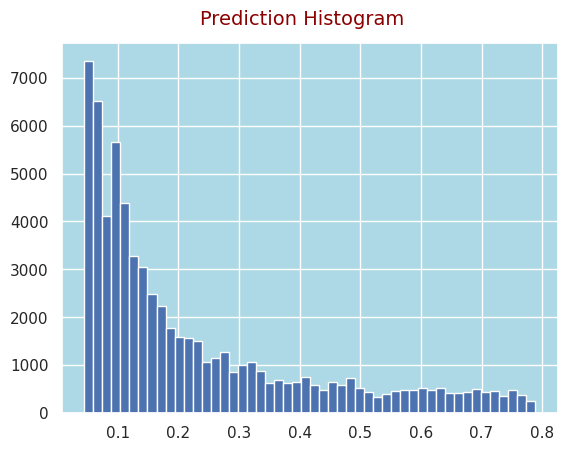

In [101]:
#plotเพื่อดูค่าที่ทำนายออกมาได้
sns.set()
plt.hist(preds, bins=50)
plt.gca().set_facecolor('lightblue')
plt.suptitle('Prediction Histogram', y=0.95, fontsize=14, c='darkred')

min(preds), max(preds)

จากการ plot ดูคำตอบนั้นก็จะพบว่าคำตอบนั้นจะมีการกระจายช่วงกันมากยิ่งขึ้น

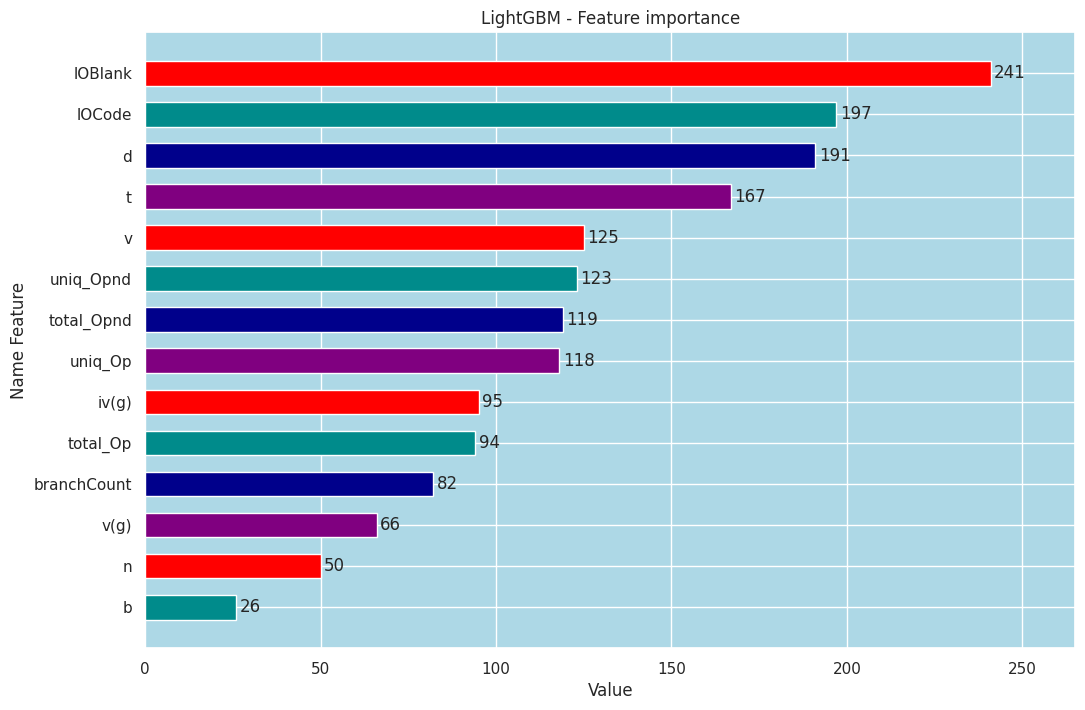

In [102]:
#polt เพื่อดู impact ของแต่ละfeature
from lightgbm import plot_importance 

plot_importance(model, figsize=(12, 8), color=['darkcyan','red','purple','darkblue'], height=0.6, max_num_features=100,
                title='LightGBM - Feature importance', xlabel='Value', ylabel='Name Feature');

plt.gca().set_facecolor('lightblue')

In [103]:
#สร้างไฟล์สำหรับ submit
sub2 = submission.copy()
sub2['defects'] = preds
sub2.to_csv('submission2.csv',index=False)
!ls

submission1.csv  submission2.csv


# Conclusion
จากที่เราได้ลองทำ Binary Classification โดยใช้ Gaussian Naïve Bayes ทำให้ได้ผลลัพท์ AUC=0.7548 จากนั้นเพิ่มประสิทธิภาพด้วยการ Boosting โดย LightGBM (Bayesian optimization) ก็จะทำให้ได้ AUC=0.7918 ซึ่งหมายความว่าประสิทธิภาพของโมลเดลนั้นเพิ่มสูงขึ้นอย่างเห็นได้ชัด และนอกจากนี้เราอาจจะสามารถเพิ่มประสิทธิภาพของโมเดลอีกได้ด้วยการปรับเปลี่ยนในเรื่อง Hyperparameter Tuning, Feature Selection, Model Selection

# Reference
* PS3E23 LGBM & bayes_opt, Mehran Kazeminia, Somayyeh Gholami. https://www.kaggle.com/code/mehrankazeminia/ps3e23-lgbm-bayes-opt/notebook
* LightGBM (Light Gradient Boosting Machine), shreyanshisingh28. https://www.geeksforgeeks.org/lightgbm-light-gradient-boosting-machine/
* PS3E23 | Binary Classification for Beginners, IQBAL SYAH AKBAR. https://www.kaggle.com/code/iqbalsyahakbar/ps3e23-binary-classification-for-beginners#Prediction-and-Submission

# สมาชิกกลุ่ม
* นายทัศน์พล แต้มช่วย 6424650056
* นายวรดนัย วงศ์มณี 6424650189
* นายธีระวิสิทธ์จินนารัตน์ 6424650312
* นายรัชตะ หมื่นรัตน์ 6424650361
* นายอธิชา เจริญธนกิจกุล 6424650494